In [89]:
def get_text(url):
    print(url)
    sourceFromURL=req.urlopen(url)
    soup=BeautifulSoup(sourceFromURL,'html.parser',from_encoding='utf-8') #from_encoding-> 한글 깨짐현상 방지
    text=""
    
    for item in soup.find_all("div", id="articleBodyContents"):
            text=text+str(item.find_all(text=True))
    return text

In [92]:
#네이버 뉴스 > 생활/문화 파트의 기사 5개 분석

import urllib.request as req
from bs4 import BeautifulSoup


#sp_nws2 > dl > dt > a

#print(newsURL)
for i in range(1,3):
    url="https://search.naver.com/search.naver?query=%EB%A7%88%EB%A6%AC%ED%85%94&where=news&ie=utf8&sm=nws_hty"
    res=req.urlopen(url)
    soup=BeautifulSoup(res,'html.parser')
    
    selectURL="#sp_nws"+str(i)+"> dl > dt > a"
    print(selectURL)
    getURL=soup.select(selectURL)
    st=str(getURL)
    st=st.split(' ')

    newsURL=st[3]
    newsURL=(newsURL.split("="))[1]
    newsURL=newsURL[1:]
    print(newsURL)
    
    OUTPUT_FILE_NAME="output.txt"

    open_output_file=open(OUTPUT_FILE_NAME,'a')
    res=get_text(newsURL)
    #print(res)
    open_output_file.write(res)
    open_output_file.close()

#sp_nws1> dl > dt > a
http://www.entermedia.co.kr/news/news_view.html?idx
http://www.entermedia.co.kr/news/news_view.html?idx
#sp_nws2> dl > dt > a
return
return


ValueError: unknown url type: 'return'

In [38]:
def clean_text(myText):
    cleaned_text=re.sub('[a-zA-Z\{\}\[\]\(\)\/_▶&\\\.\'\"]','',myText) #\\\-> 역슬래시 기호 생략
    return cleaned_text

In [39]:
import re

INPUT_FILE_NAME="output.txt"
OUTPUT_FILE_NAME="output_cleaned.txt"
read_file=open(INPUT_FILE_NAME,'r')
write_file=open(OUTPUT_FILE_NAME,'w')
text=read_file.read()
# print("before : ")
# print(text)
cleaned_text=clean_text(text)
# print("after : ")
# print(cleaned_text)

write_file.write(cleaned_text)

read_file.close()
write_file.close()

In [40]:
from konlpy.tag import Twitter
from collections import Counter

def get_tags(gtext, ntags=20):
    twitter=Twitter()
    nouns=twitter.nouns(gtext) #명사만 추출
    #print(nouns)
    cnt=Counter(nouns)
    #print(cnt)
    #print(cnt.most_common(ntags)) #상위 ntags만 추출됨.
    ret_list=[]
    for word,cnt in cnt.most_common(ntags):
        #print(word,cnt)
        temp={'tag':word,'count':cnt}
        ret_list.append(temp)
    #print(ret_list)
    return ret_list



In [41]:
text_file_name="output_cleaned.txt"
output_file_name="output_final.txt"
noun_count=10 #추출하는 명사단어의 개수 10로 한정

open_text_file=open(text_file_name,'r')
readText=open_text_file.read()

res=get_tags(readText,noun_count)

open_output_file=open(output_file_name,'w')

#print(res)
for data in res:
    noun=data['tag']
    cnt=data['count']
    open_output_file.write("{} {}\n".format(noun,cnt))
    
open_output_file.close()

C:\Users\B-17\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [42]:
from matplotlib import pyplot as plt
import matplotlib
f=open("output_final.txt",'r')
news_word=[]
word_cnt=[]


i=1
while True: #줄의 마지막까지 읽게됨.
    line=f.readline()
    word,cnt=line.split(" ")
    news_word.append(word)
    word_cnt.append(int(cnt))
    
    if i==10: break
    i+=1

f.close()
print(news_word)
print(word_cnt)


['뉴시스', '본문', '내용', '플레이어', '대회', '재', '서울', '기능', '선수', '위']
[42, 36, 36, 36, 33, 30, 27, 27, 24, 22]


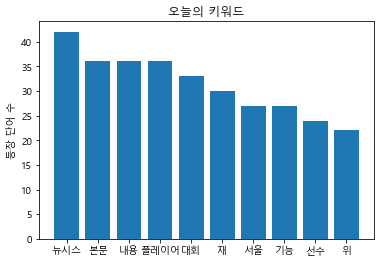

In [46]:
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

xs=[i for i, _ in enumerate(news_word)] #_ -> "enumerate된 단어는 안쓰겠다."
#print(xs)
plt.bar(xs,word_cnt)
plt.ylabel('등장 단어 수')
plt.title('오늘의 키워드')
plt.xticks([i for i, _ in enumerate(news_word)],news_word)
plt.show()